In [69]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
sns.set_style('darkgrid') #seaborn


In [70]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.head(5)

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train['allarea'] = train['1stFlrSF']+train['2ndFlrSF']+train['BsmtFinSF1']
test['allarea'] = test['1stFlrSF']+test['2ndFlrSF']+test['BsmtFinSF1']
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 81) 
The test data size after dropping Id feature is : (1459, 80) 


## Data Processing

### Outliers (deleting probably wrong data)

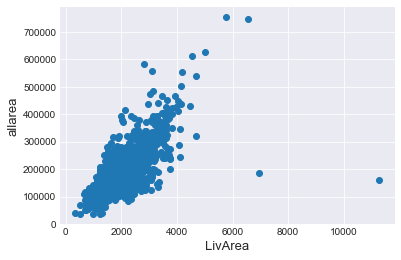

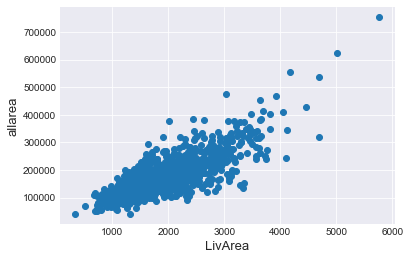


The train data size after dropping Id feature is : (1198, 81) 


In [72]:
fig, ax = plt.subplots()

ax.scatter(x = train['allarea'], y = train['SalePrice'])
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()
#only_normal sale condition
train_norm=train.loc[(train['SaleCondition'] == "Normal")]

fig, ax = plt.subplots()

ax.scatter(x = train_norm['allarea'], y = train_norm['SalePrice'])
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()
print("\nThe train data size after dropping Id feature is : {} ".format(x_norm.shape))

## Target Variable

### SalePrice is the variable we need to predict. So let's do some analysis on this variable first



 mu = 180921.20 and sigma = 79415.29



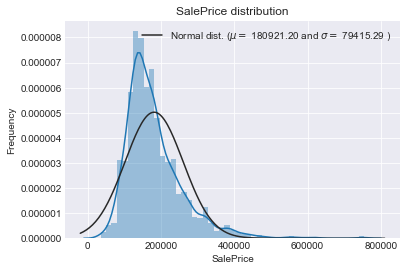

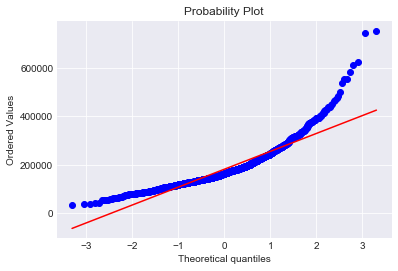

In [73]:
sns.distplot(train['SalePrice'] , fit=norm); #visualisation package

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### The same for normal sale condition



 mu = 175202.22 and sigma = 69684.53



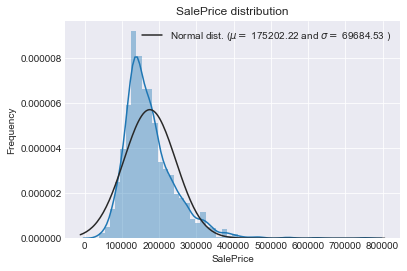

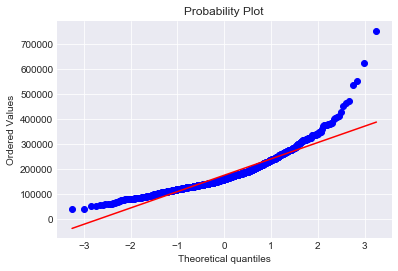

In [74]:
sns.distplot(train_norm['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_norm['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_norm['SalePrice'], plot=plt)
plt.show()